# Kaplan Meier Survival Analysis

This is a Survival Analysis created for an employee turnover problem. This is real data from a real company that I extracted from Salesforce and cleaned. The data has been obfuscated. The survival analysis will show what percent of employees leave when so they can be targeted with retention efforts.

In [13]:
import warnings
warnings.simplefilter(action='ignore')

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import os
import requests
import io

#!pip install lifelines --user
from lifelines import KaplanMeierFitter, CoxPHFitter, WeibullAFTFitter

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

#Get data from Github
url = "https://raw.githubusercontent.com/nickjmichal/projects/main/EMPLOYEE%20DATA%20-%20obfuscated.csv"
download = requests.get(url).content

dfbase = pd.read_csv(io.StringIO(download.decode('utf-8')))

dfbase.head()

,Department,Job Title,Job Area,Standard Hours,Marital Status,Hourly Rate,FULLTIME_IND,Days in Role,days_employed,Years of Service,...,Days Employed When Survey Sent,Days With Company on Submit of Survey,PC,Division,Unnamed: 18,Job Title.1,ED & DHS Average Rating,Immediate Supervisor Average Rating,Communication and Campus Average Rating,Department Morale Rating
0,58-Facility Admin,Executive Director,Executive Director,40.0,M,55.57,1,365.0,365,1.000000,...,365,365,411,North Ohio,Region A,Executive Director,0.00,5.00,4.20,4
1,58-Facility Admin,Executive Director,Executive Director,40.0,S,42.12,1,479.0,870,2.383562,...,0,30,518,North Michigan,Region B,Executive Director,4.88,5.00,5.00,5
2,58-Facility Admin,AP/Payroll Coordinator,Finance,40.0,S,14.90,1,564.0,731,2.002740,...,0,182,101,Southwest Indiana,Region C,AP/Payroll Coordinator,5.00,5.00,5.00,4
3,58-Facility Admin,AP/Payroll Coordinator,Finance,40.0,M,20.18,1,567.0,567,1.553425,...,0,183,145,South Kentucky,Region D,AP/Payroll Coordinator,3.00,4.63,3.83,4
4,58-Facility Admin,AP/Payroll Coordinator,Finance,40.0,S,17.98,1,700.0,700,1.917808,...,0,183,162,North Central Indiana,Region E,AP/Payroll Coordinator,3.88,4.88,3.67,4


In [22]:
#Select var's that I want
df = dfbase[['Job Area', 
             'Hourly Rate', 
             'FULLTIME_IND', 
             'Years of Service', 
             'apprenticeship_ind',
             'term_ind', 
             'Division',
             'ED & DHS Average Rating',
             'Immediate Supervisor Average Rating',
             'Communication and Campus Average Rating', 
             'Department Morale Rating'
            ]].copy()
df.head()

,Job Area,Hourly Rate,FULLTIME_IND,Years of Service,apprenticeship_ind,term_ind,Division,ED & DHS Average Rating,Immediate Supervisor Average Rating,Communication and Campus Average Rating,Department Morale Rating
0,Executive Director,55.57,1,1.000000,0,1,North Ohio,0.00,5.00,4.20,4
1,Executive Director,42.12,1,2.383562,0,1,North Michigan,4.88,5.00,5.00,5
2,Finance,14.90,1,2.002740,0,1,Southwest Indiana,5.00,5.00,5.00,4
3,Finance,20.18,1,1.553425,0,1,South Kentucky,3.00,4.63,3.83,4
4,Finance,17.98,1,1.917808,0,1,North Central Indiana,3.88,4.88,3.67,4


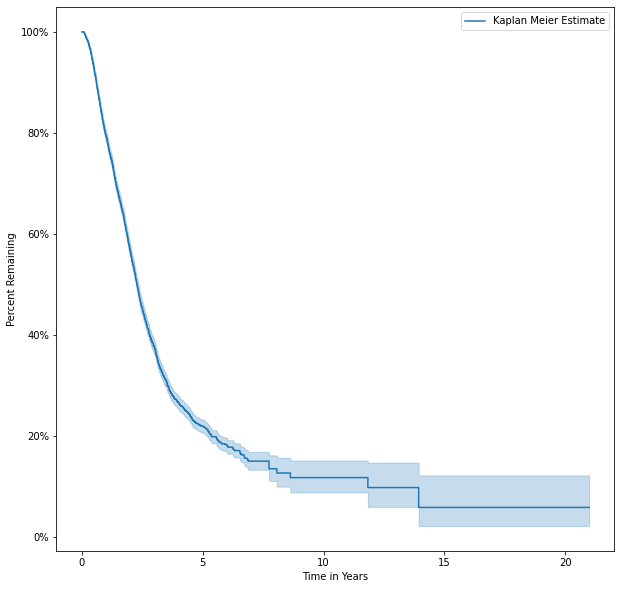

In [23]:
kmf = KaplanMeierFitter()

# Fit the data to the KMF object
kmf.fit(df['Years of Service'], df['term_ind'], label='Kaplan Meier Estimate')
ax = kmf.plot(ci_show=True)
ax.set_xlabel('Time in Years')
ax.set_ylabel('Percent Remaining')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

This analysis shows that there is a steady decline in employment for the first four years with no clear point in which to intervene in preventing employee turnover. However, a closer look at new employees (less than one year of employment) shows the following results.

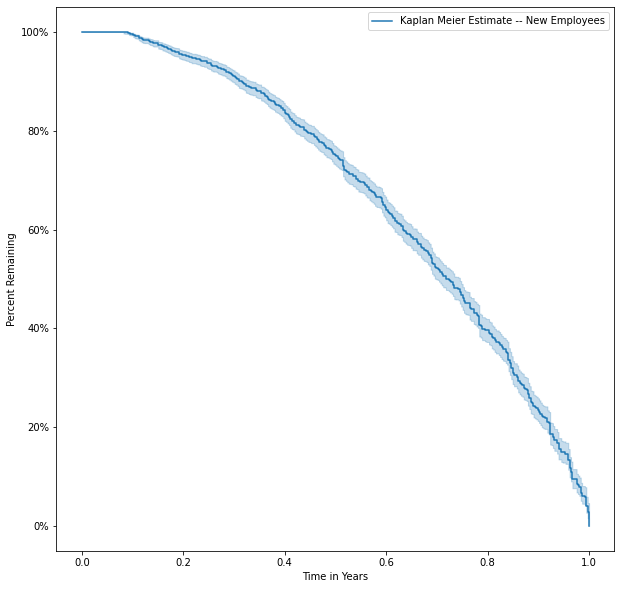

In [24]:
newEmps = df[(df['Years of Service'] <= 1)]

kmf = KaplanMeierFitter()

# Fit the data to the KMF object
kmf.fit(newEmps['Years of Service'], newEmps['term_ind'], label='Kaplan Meier Estimate -- New Employees')
ax = kmf.plot(ci_show=True)
ax.set_xlabel('Time in Years')
ax.set_ylabel('Percent Remaining')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

The plot of new employees shows that roughly 70% of employees who quit in the first year make it at least 6 months. In a simple logistic regression I ran, enrollment in the company’s mentorship program showed a strong positive correlation to empowerment. From this analysis, I would recommend that the company try and get employees enrolled in the mentorship program within the first 6 months of hire.